In [1]:
import matplotlib
import pandas
import seaborn

In [2]:
%matplotlib notebook
seaborn.set()

In [3]:
from pubg.deaths import (definitions as pubg_death_definitions, 
                         io as pubg_deaths_io)
from pubg.deaths.api import transforms as pubg_deaths_api_transforms


In [4]:
df = pandas.read_csv(
    '../data/enriched/deaths/kills_with_distances_0.csv',
    index_col=0,
    encoding='utf-8',
    nrows=100,
)

df = df[
    (df[pubg_death_definitions.MAPNAME] == 'ERANGEL') &
    ~(pubg)

]

/home/mkilian/workspace/pubg_deaths/venv/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/home/mkilian/workspace/pubg_deaths/venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>


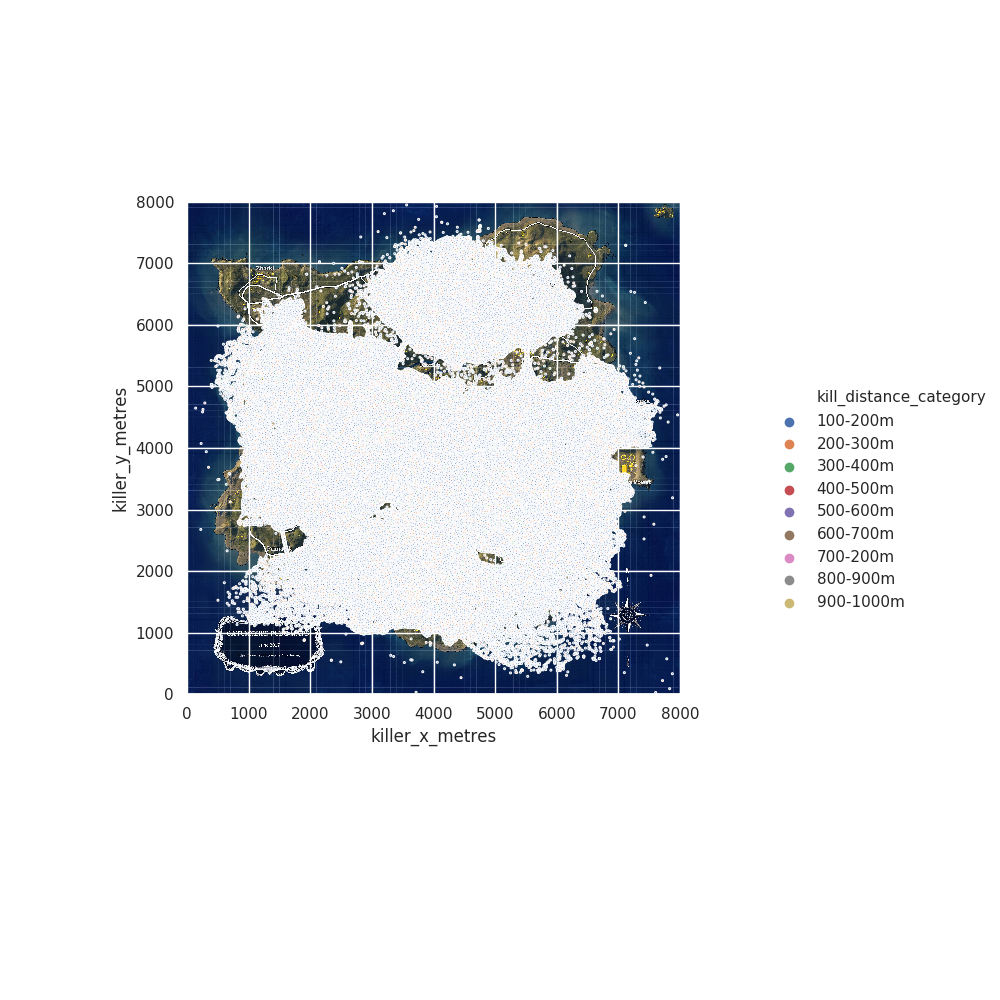

In [5]:
kill_distance_categories = {
    1: '100-200m',
    2: '200-300m',
    3: '300-400m',
    4: '400-500m',
    5: '500-600m',
    6: '600-700m',
    7: '700-200m',
    8: '800-900m',
    9: '900-1000m',
}

long_range_kills = df[
    (df[pubg_death_definitions.KILL_DISTANCE] > 100) & 
    (df[pubg_death_definitions.KILL_DISTANCE] < 1000)
]

long_range_kills['kill_distance_category'] = (
    long_range_kills[pubg_death_definitions.KILL_DISTANCE]
    .apply(lambda d: kill_distance_categories[d // 100])
)

grid = seaborn.relplot(
    data=long_range_kills,
    x=pubg_death_definitions.KILLER_X,
    y=pubg_death_definitions.KILLER_Y,
    hue='kill_distance_category',
    hue_order=sorted(kill_distance_categories.values()),
    s=2
)

In [6]:
grid.fig.set_size_inches(10, 10)
grid.fig.figimage?

In [7]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../data/erangel.png')


grid.ax.imshow(img, extent=(0, 8000, 0, 8000))